# Bias

A model that is insufficiently complex for the data it is modeling will have high bias. This is because it will not be able to accurately capture the relationship between the features and the target. This is also known as underfitting. This can be evaluated by comparing the training and testing scores. If the model fails to capture the relationship between the features and the target in the training set, it will also fail to do so in the testing set. The result is poor performance on both sets.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score


def true_fun(X):
    return np.cos(1.5 * np.pi * X)


np.random.seed(0)

n_samples = 10

model = LinearRegression()

plt.figure(figsize=(16, 4))
for i in range(3):
    ax = plt.subplot(1, 3, i + 1)
    plt.setp(ax, xticks=(), yticks=())

    X = np.sort(np.random.rand(n_samples))
    y = true_fun(X) + np.random.randn(n_samples) * 0.1

    model.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        model, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, model.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(
        "Model {}\nMSE = {:.2e}(+/- {:.2e})".format(
            i + 1, -scores.mean(), scores.std()
        )
    )
plt.show()

# Variance

In terms of model fitting, a model that fits the training data well but not the test data describes *overfitting*. This is because the training data is only an empirical sample of the true underlying distribution. A different sampling of the distribution may yield a set that more closely resembles the test set. Due to the *variance* of the underlying distribution, our model overfits the patterns that exist in the training set.

In the example below, a 5th degree polynomial is fit to three different samplings of the same dataset. Only one of them is a good fit based on the test data.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


def true_fun(X):
    return np.cos(1.5 * np.pi * X)


np.random.seed(0)

n_samples = 10
degree = 5

plt.figure(figsize=(16, 4))
for i in range(3):
    ax = plt.subplot(1, 3, i + 1)
    plt.setp(ax, xticks=(), yticks=())

    X = np.sort(np.random.rand(n_samples))
    y = true_fun(X) + np.random.randn(n_samples) * 0.1

    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(
        "Model {}\nMSE = {:.2e}(+/- {:.2e})".format(
            i + 1, -scores.mean(), scores.std()
        )
    )
plt.show()

# The Bias-Variance Tradeoff

If a model is not complex enough to capture the underlying distribution, it will perform poorly on both the training and test sets. Indeed, the model has low bias. If the model is too complex, it will exhibit low bias and high variance, overfitting the training set while failing to generalize well to unseen data. The solution then is to find a tradeoff between bias and variance with respect to the model complexity.

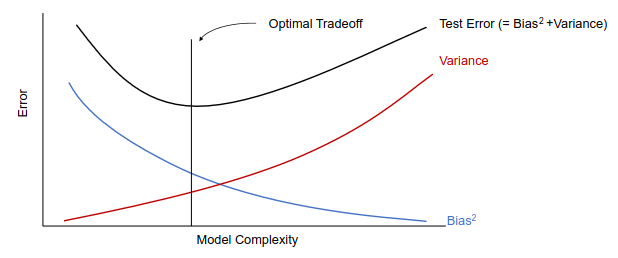

The figure above is from (https://cs229.stanford.edu/main_notes.pdf) and depicts the bias-variance tradeoff based on model complexity. When we chose a simple model, we saw that the model had high bias and low variance. As we increased the complexity of the model, the bias decreased and the variance increased. The optimal model complexity is the point at which the total error is minimized. Let's try a 2nd degree polynomial.

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


def true_fun(X):
    return np.cos(1.5 * np.pi * X)


np.random.seed(0)

n_samples = 10
degree = 3

plt.figure(figsize=(16, 4))
for i in range(3):
    ax = plt.subplot(1, 3, i + 1)
    plt.setp(ax, xticks=(), yticks=())

    X = np.sort(np.random.rand(n_samples))
    y = true_fun(X) + np.random.randn(n_samples) * 0.1

    polynomial_features = PolynomialFeatures(degree=degree, include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline(
        [
            ("polynomial_features", polynomial_features),
            ("linear_regression", linear_regression),
        ]
    )
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(
        pipeline, X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10
    )

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor="b", s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title(
        "Model {}\nMSE = {:.2e}(+/- {:.2e})".format(
            i + 1, -scores.mean(), scores.std()
        )
    )
plt.show()